这一章开始,我们将从频域分析离散时间信号和系统.
## DTFT变换
序列$x[n]$的离散时间傅里叶变换(DTFT)$X(e^{j\omega})$
$$
X\left(e^{j \omega}\right)=\sum_{n=-\infty}^{\infty} x[n] e^{-j \omega n}
$$
通常$X(e^{j\omega})$是实变量$\omega$的一个复函数,可以写成
$$
X\left(e^{j \omega}\right)=X_{r e}\left(e^{j \omega}\right)+j X_{im}\left(e^{j \omega}\right)
$$
其中$X_{r e}\left(e^{j \omega}\right)$和$X_{im}\left(e^{j \omega}\right)$分别是$X(e^{j\omega})$的实部和虚部,它们都是$\omega$的实函数.$X(e^{j\omega})$也可以表示为
$$
X\left(e^{j \omega}\right)=\left|X\left(e^{j \omega}\right)\right| e^{j \theta(\omega)}
$$
其中,
$$
\theta(\omega)=\arg \left\{X\left(e^{j \omega}\right)\right\}
$$
$\left|X\left(e^{j \omega}\right)\right| $称为幅度函数,$\theta(\omega)$称为相位函数,这两个函数都是$\omega$的实函数.


当DTFT变换形式如下类似如下时,可以通过freqz计算DTFT变换
$$
X\left(e^{\jmath \omega}\right)=\frac{p_{0}+p_{1} e^{-j \omega}+\cdots+p_{M} e^{-j \omega M}}{d_{0}+d_{1} e^{-j \omega}+\cdots+d_{N} e^{-j \omega N}}
$$



Text(0.5, 1.0, 'Image Part')

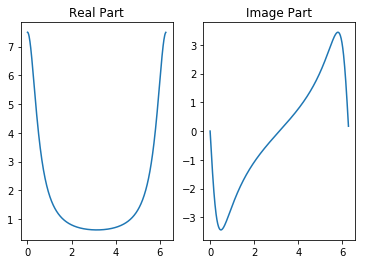

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# 离散时间傅里叶变换
w = np.arange(-4*np.pi,4*np.pi,8*np.pi/511)
num = np.array([2,1])
den = np.array([1,-0.6])

ws, h = signal.freqz(num,a=den,whole=True)
# 离散时间傅里叶变换的实部和虚部
plt.subplot(121)
plt.plot(ws,np.real(h))
plt.title('Real Part')
plt.subplot(122)
plt.plot(ws,np.imag(h))
plt.title('Image Part')

Text(0.5, 1.0, 'Phase Spectrum')

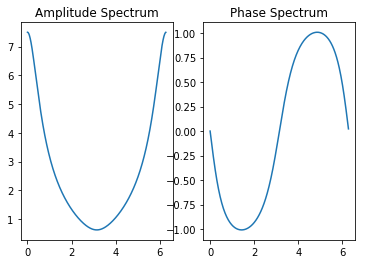

In [17]:
# 离散时间傅里叶变换的幅度谱和相位谱
plt.subplot(121)
plt.plot(ws,np.abs(h))
plt.title('Amplitude Spectrum')
plt.subplot(122)
plt.plot(ws,np.angle(h))
plt.title('Phase Spectrum')

## 离散时间傅里叶变换的收敛性
### 指数序列
指数序列定义为
$$
x[n] = A \alpha ^n \mu[n]
$$
其中,$A$和$\alpha$是任意的实数或者复数,表示为
$$
\alpha = e^{\sigma_0+j\omega_0} \quad A = |A|e^{j\phi}
$$

其离散时间傅里叶变换为
$$
	\begin{split}
		X(e^{j\omega})&=|A|e^{j\phi}\sum_{n=-\infty}^{\infty} \alpha^n \mu[n] e^{-j\omega n} = |A|e^{j\phi}\sum_{n=0}^{\infty} \alpha^n  e^{-j\omega n} \\
		X(e^{j\omega})&= \frac{|A|e^{j\phi}}{1-\alpha e^{-j\omega}}
		\end{split}
$$

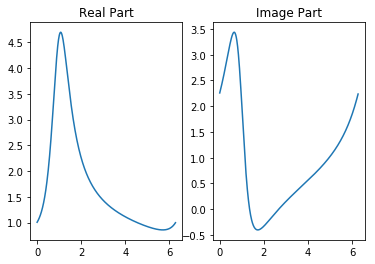

In [122]:
# 产生一个指数序列:sigma=-0.5,w0=0.15,phi=0.2,|A|=10
N = 100
n = np.arange(N) # 定义序号
w0=0.15
phi=0.5
A=2
sigma=-0.5 # try some value of sigma >0
en = A*np.exp(sigma*n+1j*(2*np.pi*n*w0+phi))

ws, h = signal.freqz(en,whole=True)
# 离散时间傅里叶变换的实部和虚部
plt.subplot(121)
plt.plot(ws,np.real(h))
plt.title('Real Part')
plt.subplot(122)
plt.plot(ws,np.imag(h))
plt.title('Image Part')
plt.show()

### Sinc序列与矩形窗频谱

$$
 h_{LP}[n] = \frac{\sin \omega_c n}{\omega_c n} \longleftrightarrow H_{LP}(e^{j\omega}) = \begin{cases}
		1, & \quad 0\leq |\omega| \leq \omega_c\\
		0, & \quad \omega_c \leq |\omega| \leq \pi
	\end{cases}
$$

/Users/lyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


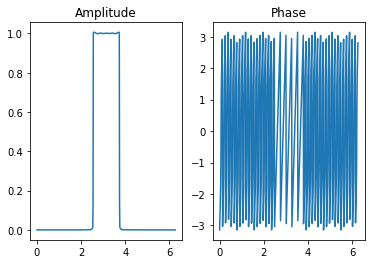

In [118]:
# Sinc函数和矩形窗
N = 2000 # increase N, then the spectrum converge to window function
Nc = np.int(N/2)

n = np.arange(N) # 定义序号
w0=0.6
phi=np.pi
sinc = np.sin(w0*(n-N/2))/np.pi/(n-N/2)
sinc[Nc]=w0/np.pi
sinc = sinc*np.exp(1j*phi*n)

ws, h = signal.freqz(sinc,whole=True)
# 离散时间傅里叶变换的实部和虚部
plt.subplot(121)
plt.plot(ws,np.abs(h))
plt.title('Amplitude')
plt.subplot(122)
plt.plot(ws,np.angle(h))
plt.title('Phase')
plt.show()

### 常数序列


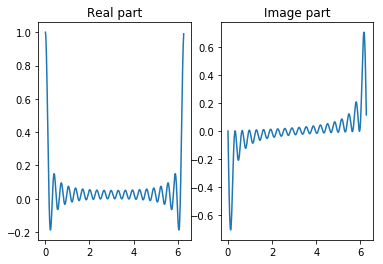

In [131]:
# Sinc函数和矩形窗
N = 20 # increase N, 
Nc = np.int(N/2)

n = np.arange(N) # 定义序号
w0=0.6
phi=np.pi
x = np.ones([N,])/N

ws, h = signal.freqz(x,whole=True)
# 离散时间傅里叶变换的实部和虚部
plt.subplot(121)
plt.plot(ws,np.real(h))
plt.title('Real part')
plt.subplot(122)
plt.plot(ws,np.imag(h))
plt.title('Image part')
plt.show()

## 离散时间傅里叶变换的性质
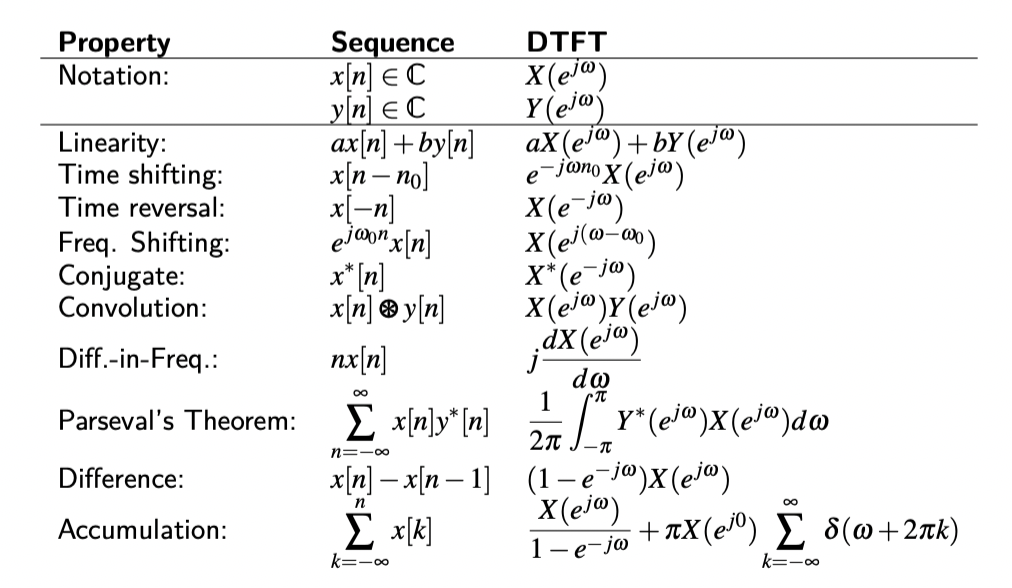

### 时移定理

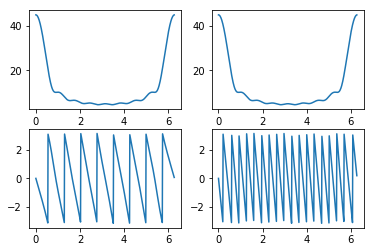

In [20]:
num = np.array([1,2,3,4,5,6,7,8,9])
ws, h1 = signal.freqz(num,whole=True)
D = 10
ws, h2 = signal.freqz(np.concatenate((np.zeros([D,]),num),axis=0),whole=True)
plt.subplot(221)
plt.plot(ws,np.abs(h1))
plt.subplot(222)
plt.plot(ws,np.abs(h2))
plt.subplot(223)
plt.plot(ws,np.angle(h1))
plt.subplot(224)
plt.plot(ws,np.angle(h2))
# 幅度谱不变,相位谱变化

### 频移定理


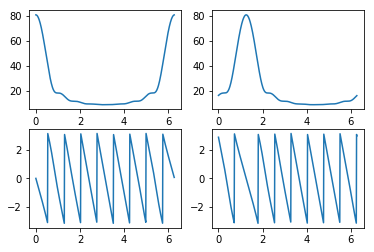

In [23]:
num = np.array([1,3,5,7,9,11,13,15,17])
n = np.arange(len(num))
w0 = 0.4*np.pi # 尝试改变这个大小,然后观察显示的图形, 并结合理论分析
num1 = np.exp(1j*w0*n)*num
ws, h1 = signal.freqz(num,whole=True)
ws, h2 = signal.freqz(num1,whole=True)

plt.subplot(221)
plt.plot(ws,np.abs(h1))
plt.subplot(222)
plt.plot(ws,np.abs(h2))
plt.subplot(223)
plt.plot(ws,np.angle(h1))
plt.subplot(224)
plt.plot(ws,np.angle(h2))
# 幅度谱和相位谱平移


### 卷积定理


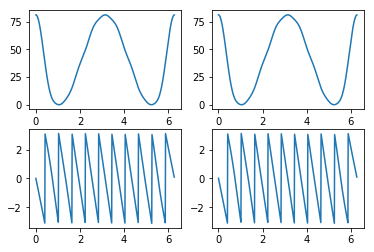

In [24]:
# 时域卷积,频域相乘
num1 = np.array([1,3,5,7,9,11,13,15,17])
num2 = np.array([1,-2,3,-2,1])

y = signal.convolve(num1,num2)
ws, h1 = signal.freqz(num1,whole=True)
ws, h2 = signal.freqz(num2,whole=True)
ws, h3 = signal.freqz(y,whole=True)

hp = h1*h2


plt.subplot(221)
plt.plot(ws,np.abs(h3))
plt.subplot(222)
plt.plot(ws,np.abs(hp))
plt.subplot(223)
plt.plot(ws,np.angle(h3))
plt.subplot(224)
plt.plot(ws,np.angle(hp))


### 调制定理


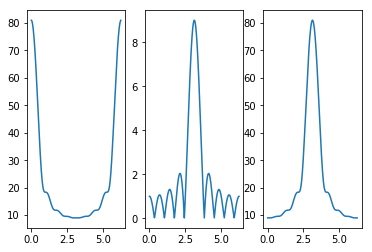

In [39]:
# 时域乘积,频域卷积
num1 = np.array([1,3,5,7,9,11,13,15,17])
num2 = np.array([1,-1,1,-1,1,-1,1,-1,1])

y = num1*num2
ws, h1 = signal.freqz(num1,whole=True)
ws, h2 = signal.freqz(num2,whole=True)
ws, h3 = signal.freqz(y,whole=True)

# hp = signal.convolve(h1,h2)
# hp = hp[:(len(ws))]/len(ws)

plt.subplot(131)
plt.plot(ws,np.abs(h1))
plt.subplot(132)
plt.plot(ws,np.abs(h2))
plt.subplot(133)
plt.plot(ws,np.abs(h3))
# plt.subplot(224)
# plt.plot(ws,np.angle(hp))



### 翻转定理

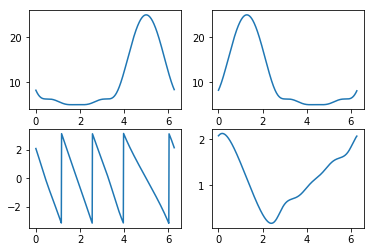

In [47]:
# 时域翻转,频域翻转
num1 = np.array([1,3,5,7,9])
w0 = 5
num1 = num1*np.exp(np.arange(len(num1))*1j*w0)
num2 = np.flipud(num1)


ws, h1 = signal.freqz(num1,whole=True)
ws, h2 = signal.freqz(num2,whole=True)


plt.subplot(221)
plt.plot(ws,np.abs(h1))
plt.subplot(222)
plt.plot(ws,np.abs(h2))
plt.subplot(223)
plt.plot(ws,np.angle(h1))
plt.subplot(224)
plt.plot(ws,np.angle(h2))
